In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')
plt.style.use('ggplot') 


In [2]:
df=pd.read_csv('heart_disease_uci.csv')

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
print("Number of duplicate rows before removing:", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of duplicate rows after removing:", df.duplicated().sum())


Number of duplicate rows before removing: 0
Number of duplicate rows after removing: 0


In [7]:
# Handle Missing Values:
# Numerical columns - Fill missing values with the median
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical columns - Fill missing values with the mode
categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

Youngest patient:
      age   sex    dataset               cp  num
303   28  Male  Cleveland  atypical angina    0

Oldest patient:
      age   sex        dataset            cp  num
161   77  Male      Cleveland  asymptomatic    4
751   77  Male  VA Long Beach  asymptomatic    3


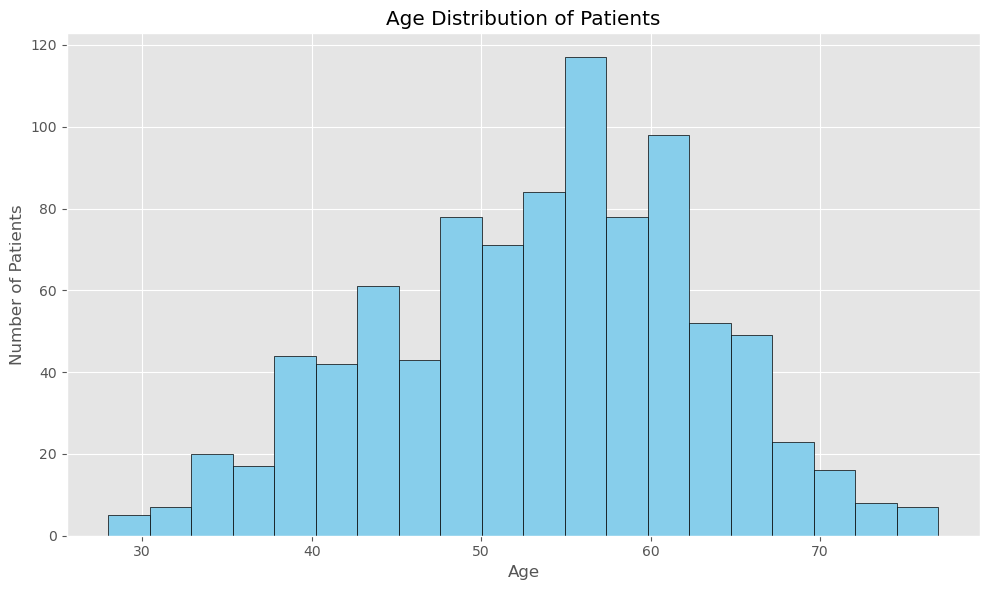

In [8]:
 # Find the youngest and oldest patient
youngest_patient = df[df['age'] == df['age'].min()]
oldest_patient = df[df['age'] == df['age'].max()]

# Display the youngest and oldest patient details
print("Youngest patient:\n", youngest_patient[['age', 'sex', 'dataset', 'cp', 'num']])
print("\nOldest patient:\n", oldest_patient[['age', 'sex', 'dataset', 'cp', 'num']])

# Plot the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()


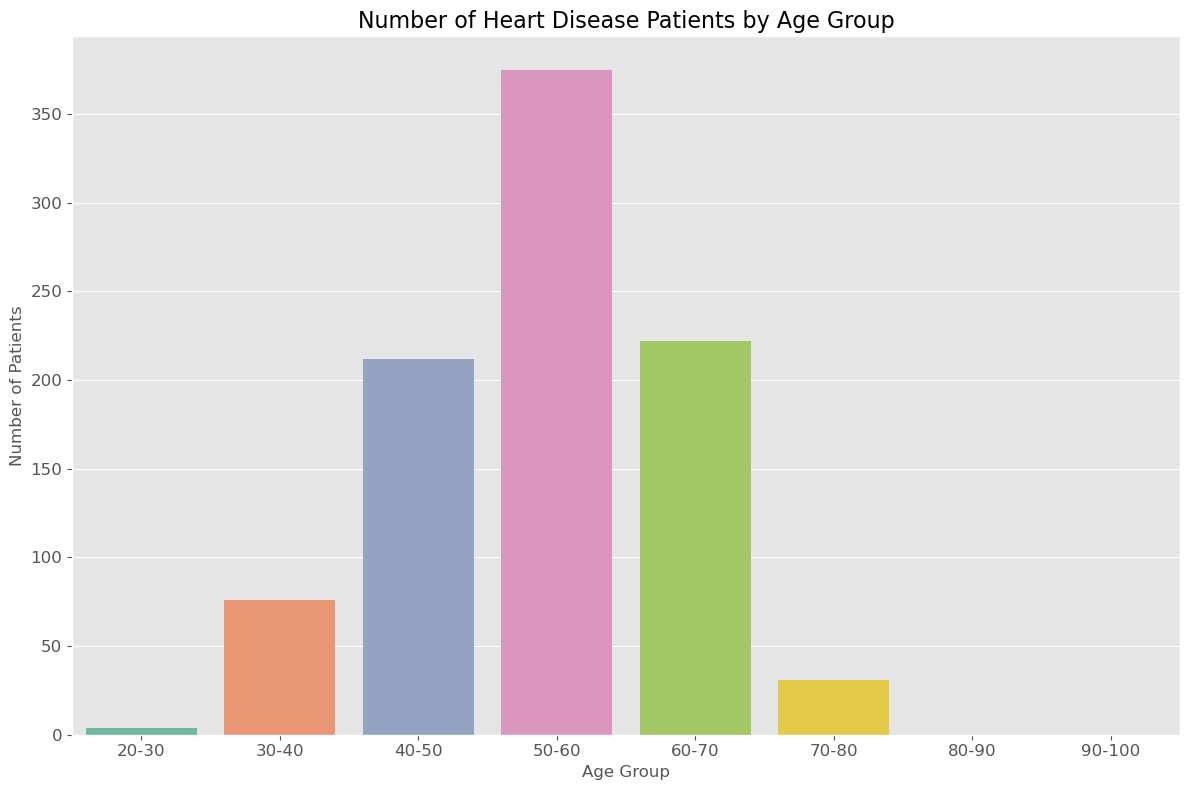

In [9]:
# Plotting number of heart disease patients by age group

age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create the 'age_group' column
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='age_group', palette='Set2')
plt.title('Number of Heart Disease Patients by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [10]:
df_heart_disease = df[df['num'] > 0]

# Calculate the mean and mode of age for patients with heart disease
avg_age_heart_disease = df_heart_disease['age'].mean()
mode_age_heart_disease = df_heart_disease['age'].mode()[0]
# Display the results
print(f"Average age of patients with heart disease: {avg_age_heart_disease}")
print(f"Mode age of patients with heart disease: {mode_age_heart_disease}")
print(df_heart_disease['sex'].value_counts())


Average age of patients with heart disease: 55.90373280943025
Mode age of patients with heart disease: 58
sex
Male      459
Female     50
Name: count, dtype: int64


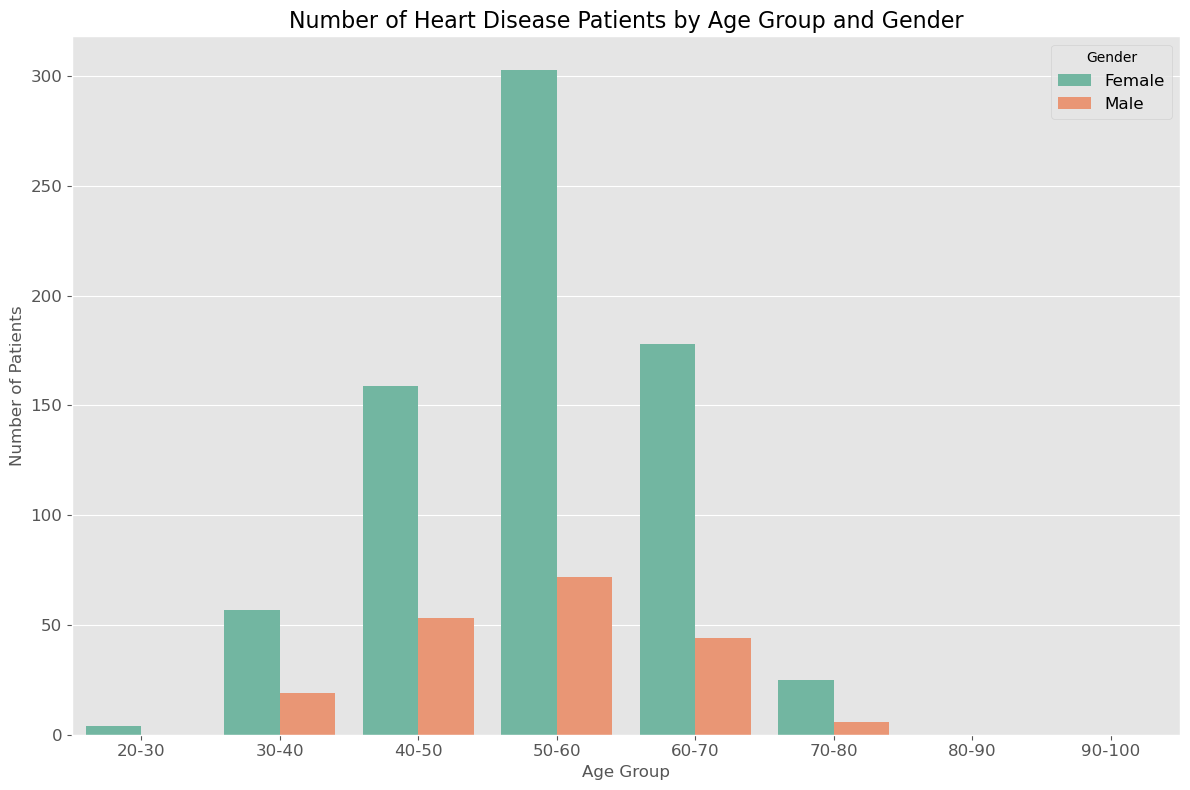

In [11]:
# Plotting number of heart disease patients by age group with gender as hue
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='age_group', hue='sex', palette='Set2')
plt.title('Number of Heart Disease Patients by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', labels=['Female', 'Male'], fontsize=12)

plt.tight_layout()  # Ensure everything fits in the plot
plt.show()


In [12]:
print(df['sex'].value_counts())


sex
Male      726
Female    194
Name: count, dtype: int64


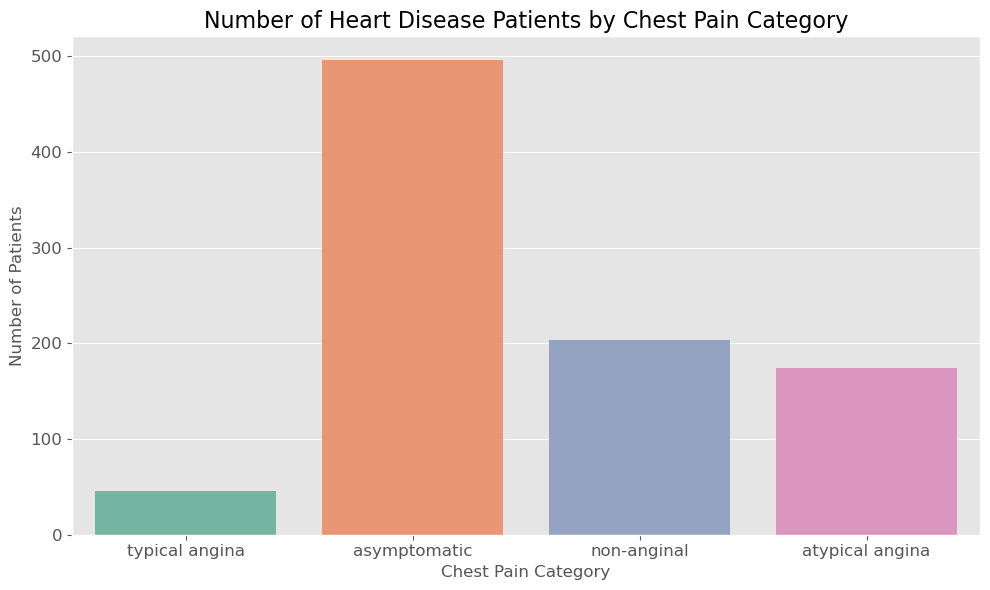

In [13]:
# Plotting number of heart disease patients by chest pain category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cp', palette='Set2')
plt.title('Number of Heart Disease Patients by Chest Pain Category', fontsize=16)
plt.xlabel('Chest Pain Category', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  # Ensure everything fits in the plot
plt.show()


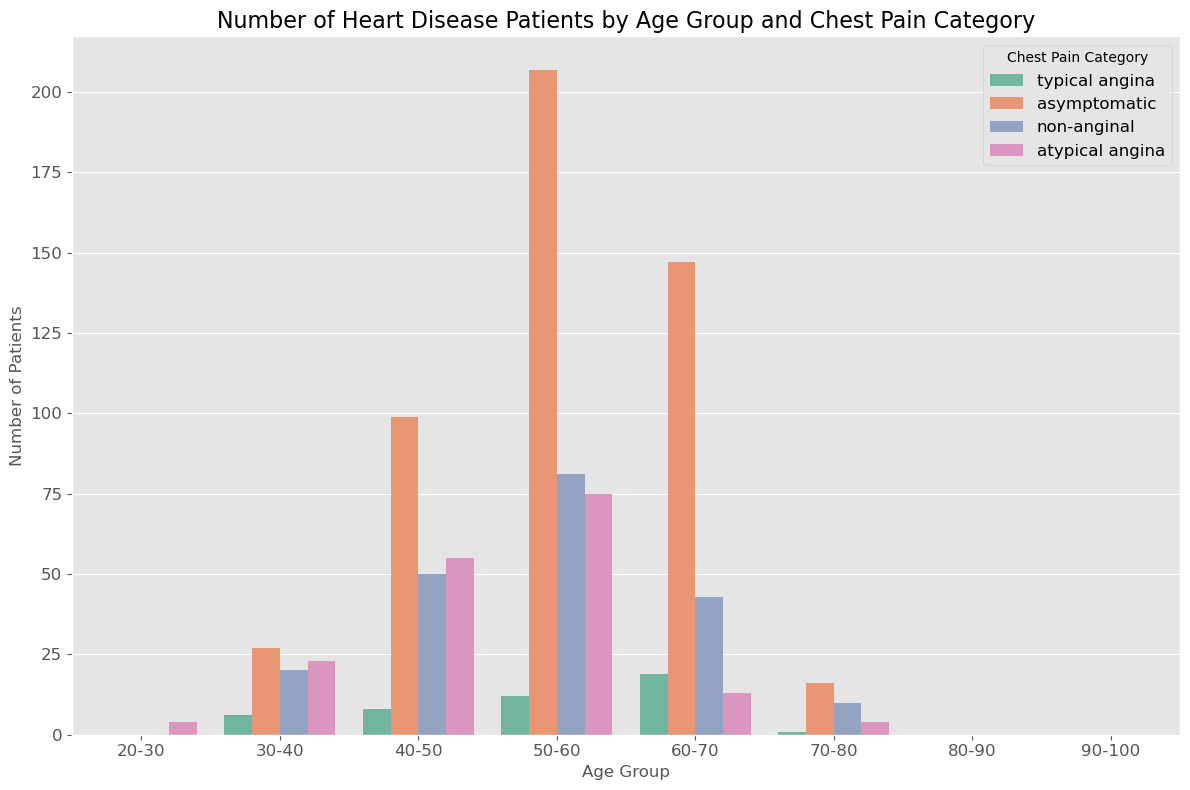

In [14]:
# Plotting number of heart disease patients by age group and chest pain category
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='age_group', hue='cp', palette='Set2')
plt.title('Number of Heart Disease Patients by Age Group and Chest Pain Category', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Chest Pain Category', fontsize=12)

plt.tight_layout()  # Ensure everything fits in the plot
plt.show()


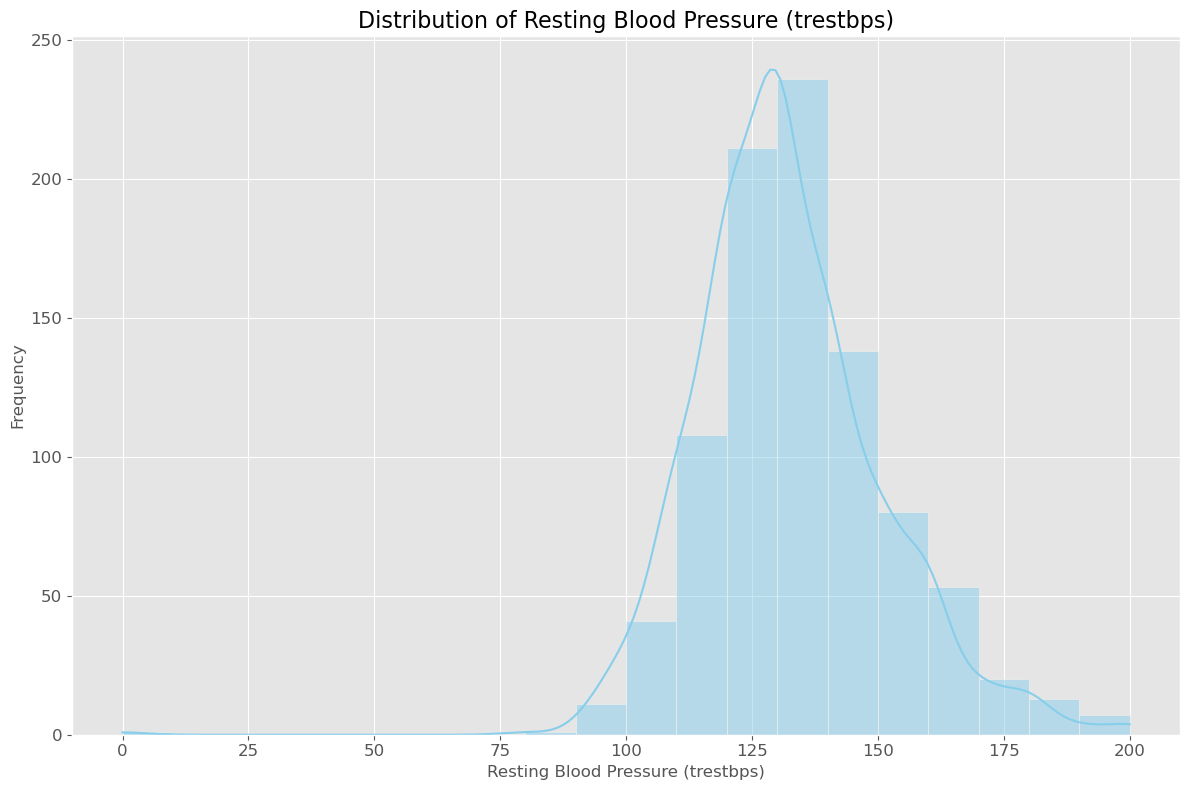

In [15]:
# Plotting the distribution of resting blood pressure (trestbps)
plt.figure(figsize=(12, 8))
sns.histplot(df['trestbps'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Resting Blood Pressure (trestbps)', fontsize=16)
plt.xlabel('Resting Blood Pressure (trestbps)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


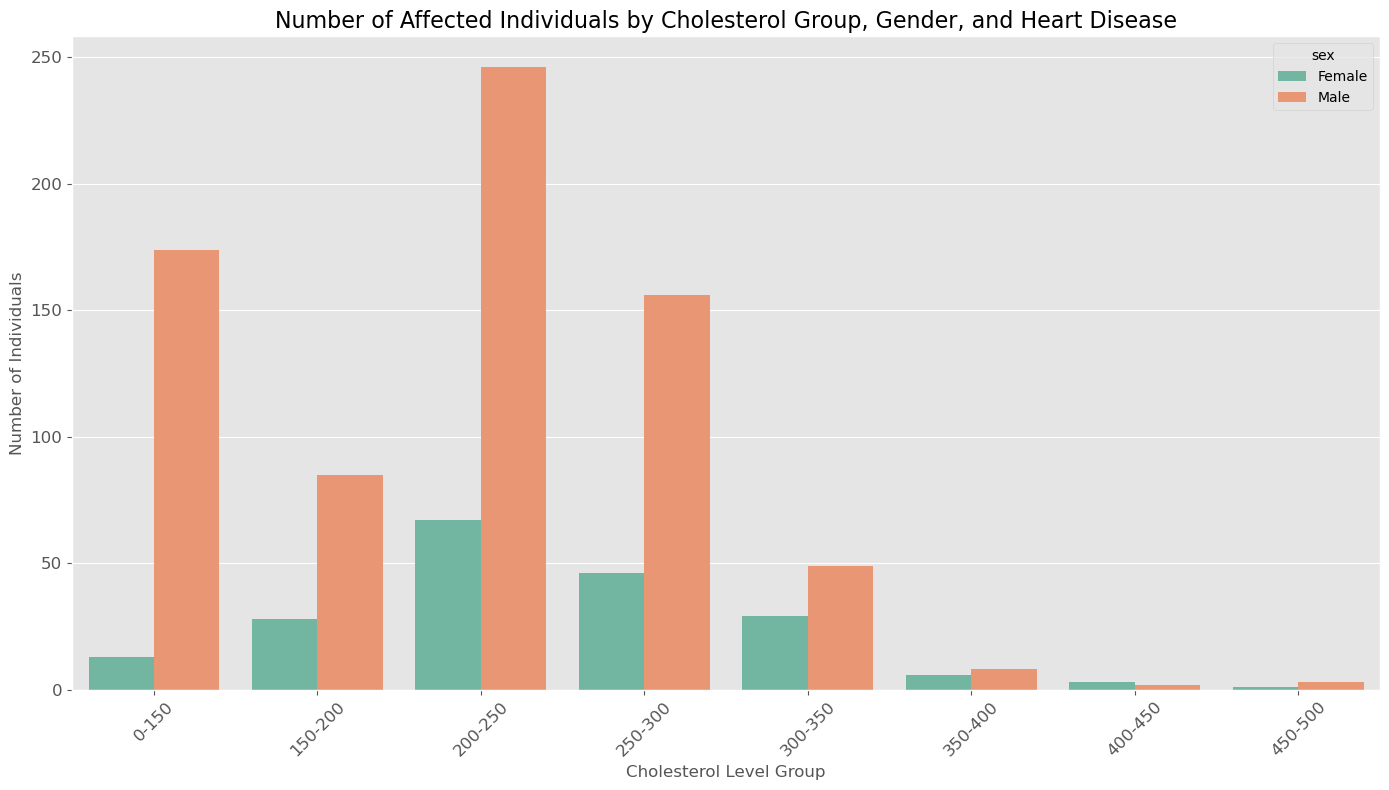

In [16]:
# Categorize cholesterol levels into bins (you can adjust the bins as needed)
chol_bins = [0, 150, 200, 250, 300, 350, 400, 450, 500]
chol_labels = ['0-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500']

# Add a column for cholesterol categories
df['chol_group'] = pd.cut(df['chol'], bins=chol_bins, labels=chol_labels, right=False)

# Create a column to indicate heart disease status
df['heart_disease'] = df['num'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Plotting bar chart for Cholesterol Categories, Age Group, Heart Disease, and Gender
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='chol_group', hue='sex', palette='Set2', dodge=True, 
              hue_order=['Female', 'Male'])

# Title and labels
plt.title('Number of Affected Individuals by Cholesterol Group, Gender, and Heart Disease', fontsize=16)
plt.xlabel('Cholesterol Level Group', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


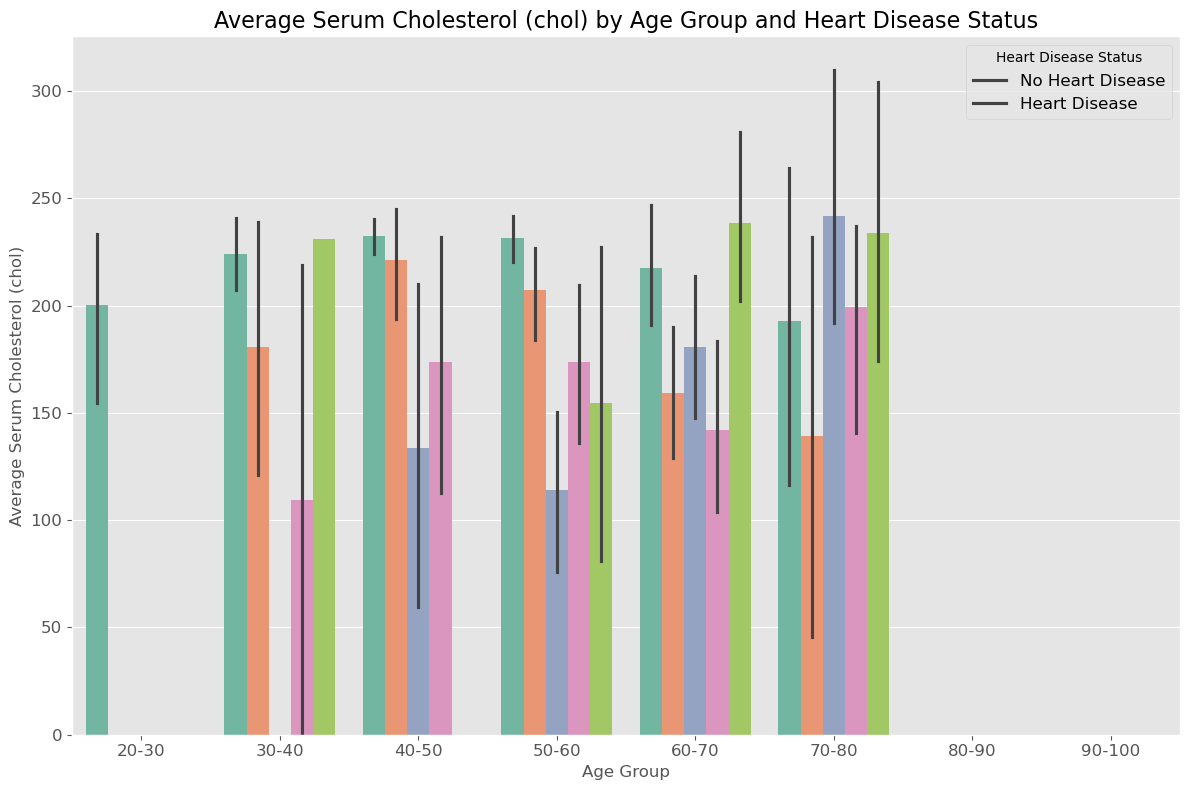

In [17]:
# Plotting the average serum cholesterol (chol) by age group, heart disease status, and gender
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='age_group', y='chol', hue='num', palette='Set2')
plt.title('Average Serum Cholesterol (chol) by Age Group and Heart Disease Status', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Serum Cholesterol (chol)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Heart Disease Status', labels=['No Heart Disease', 'Heart Disease'], fontsize=12)

plt.tight_layout()
plt.show()


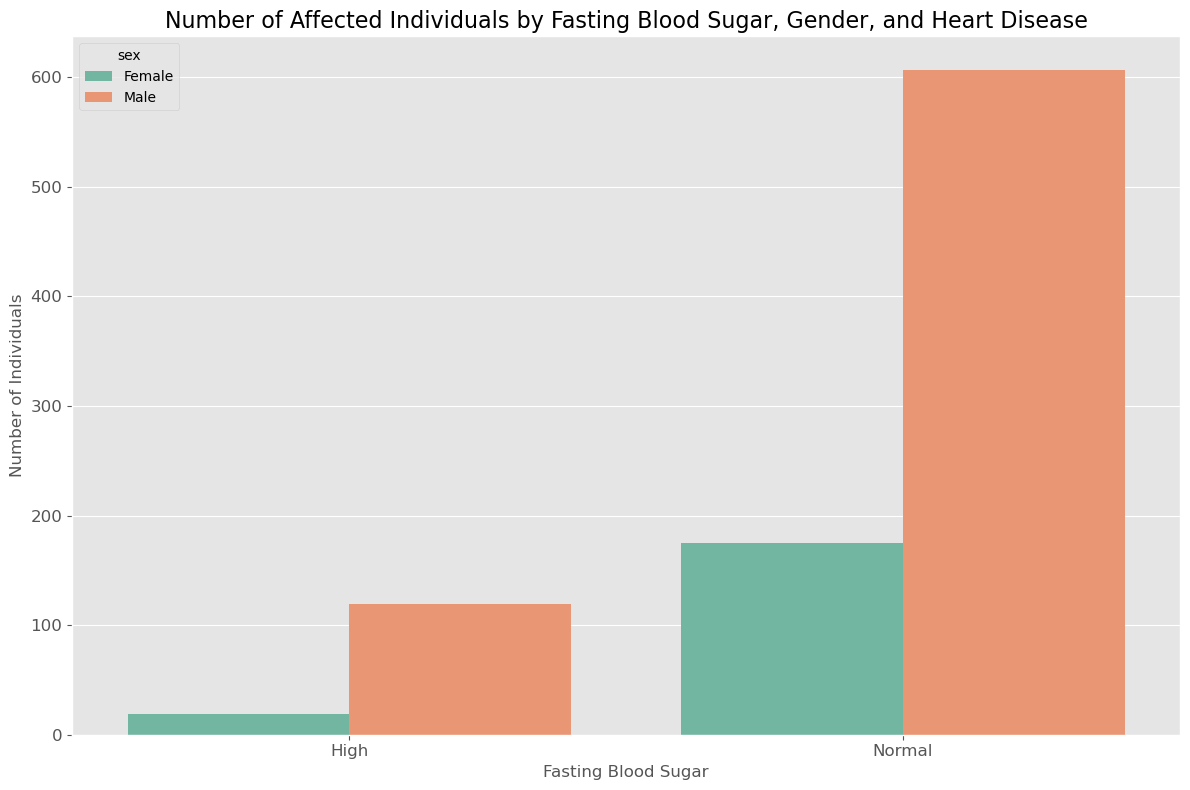

In [18]:
# Convert 'fbs' into a categorical variable for better visualization
df['fbs_group'] = df['fbs'].apply(lambda x: 'High' if x else 'Normal')

# Create a column to indicate heart disease status (1 for affected, 0 for not)
df['heart_disease'] = df['num'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Plotting the bar chart for Fasting Blood Sugar, Gender, and Heart Disease
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='fbs_group', hue='sex', palette='Set2', dodge=True, 
              hue_order=['Female', 'Male'])

# Title and labels
plt.title('Number of Affected Individuals by Fasting Blood Sugar, Gender, and Heart Disease', fontsize=16)
plt.xlabel('Fasting Blood Sugar', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


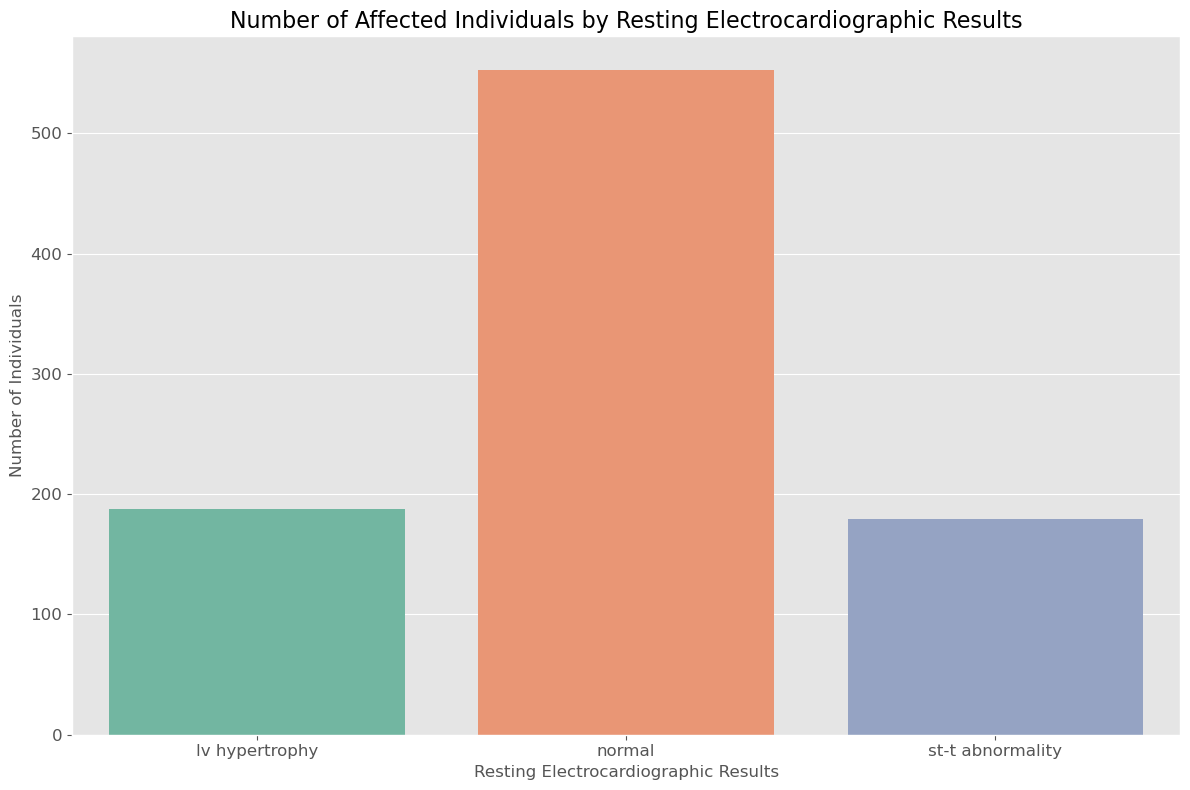

In [19]:
# Plotting the bar chart for Resting Electrocardiographic Results and Number of Affected Individuals
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='restecg', palette='Set2')

# Title and labels
plt.title('Number of Affected Individuals by Resting Electrocardiographic Results', fontsize=16)
plt.xlabel('Resting Electrocardiographic Results', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


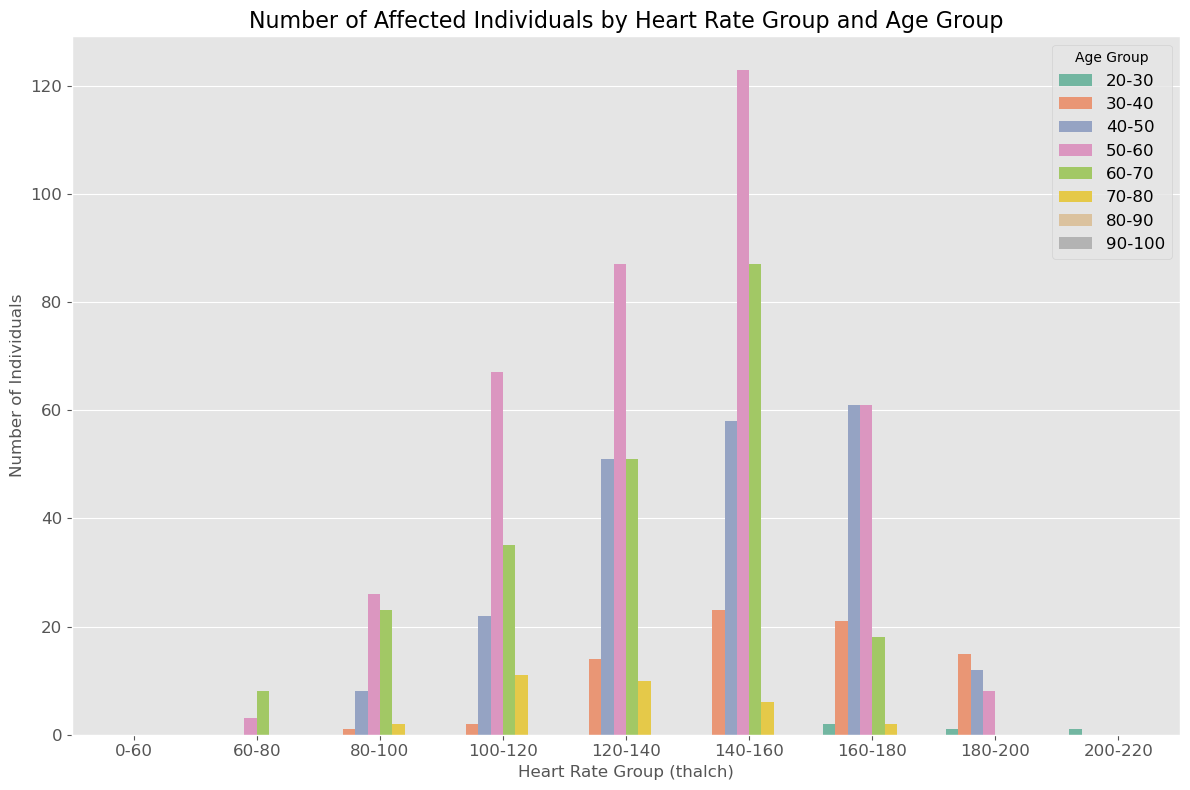

In [20]:
# Define the bins and labels for heart rate (thalch)
thalch_bins = [0, 60, 80, 100, 120, 140, 160, 180, 200, 220]
thalch_labels = ['0-60', '60-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200', '200-220']

# Add a new column 'thalch_group' to categorize heart rate into bins
df['thalch_group'] = pd.cut(df['thalch'], bins=thalch_bins, labels=thalch_labels, right=False)

# Plotting the bar chart for heart rate bins with hue as age group
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='thalch_group', hue='age_group', palette='Set2')

# Title and labels
plt.title('Number of Affected Individuals by Heart Rate Group and Age Group', fontsize=16)
plt.xlabel('Heart Rate Group (thalch)', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Age Group', fontsize=12)

plt.tight_layout()
plt.show()


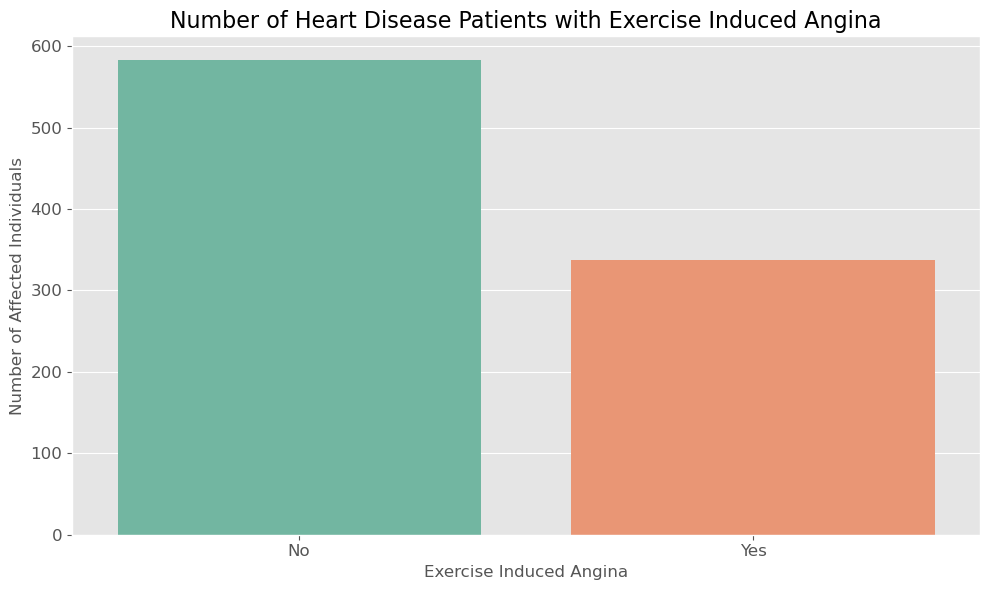

In [21]:
# Plotting the number of affected individuals based on exang (exercise induced angina)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='exang', palette='Set2')
plt.title('Number of Heart Disease Patients with Exercise Induced Angina', fontsize=16)
plt.xlabel('Exercise Induced Angina', fontsize=12)
plt.ylabel('Number of Affected Individuals', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


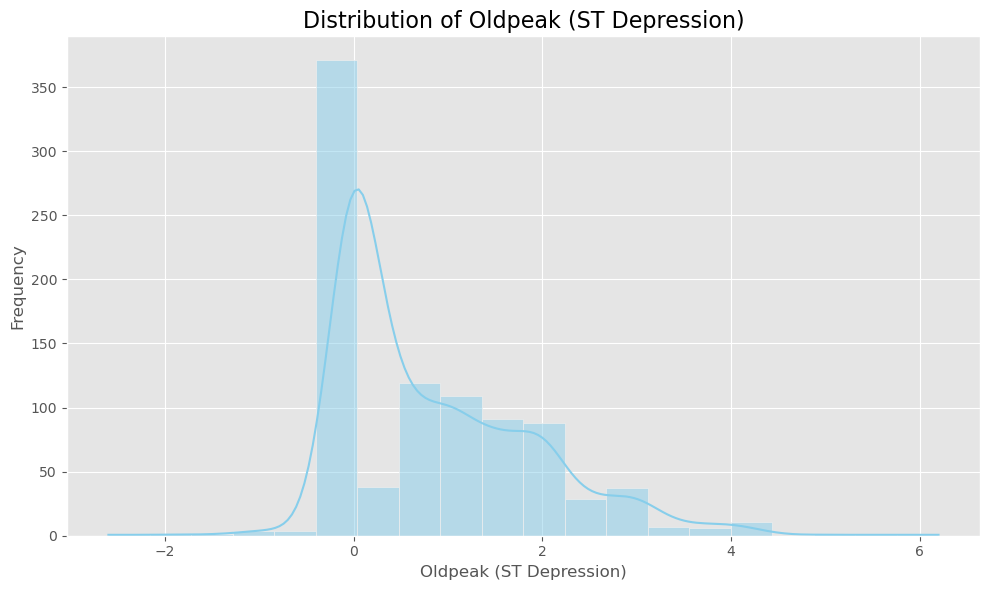

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['oldpeak'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Oldpeak (ST Depression)', fontsize=16)
plt.xlabel('Oldpeak (ST Depression)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


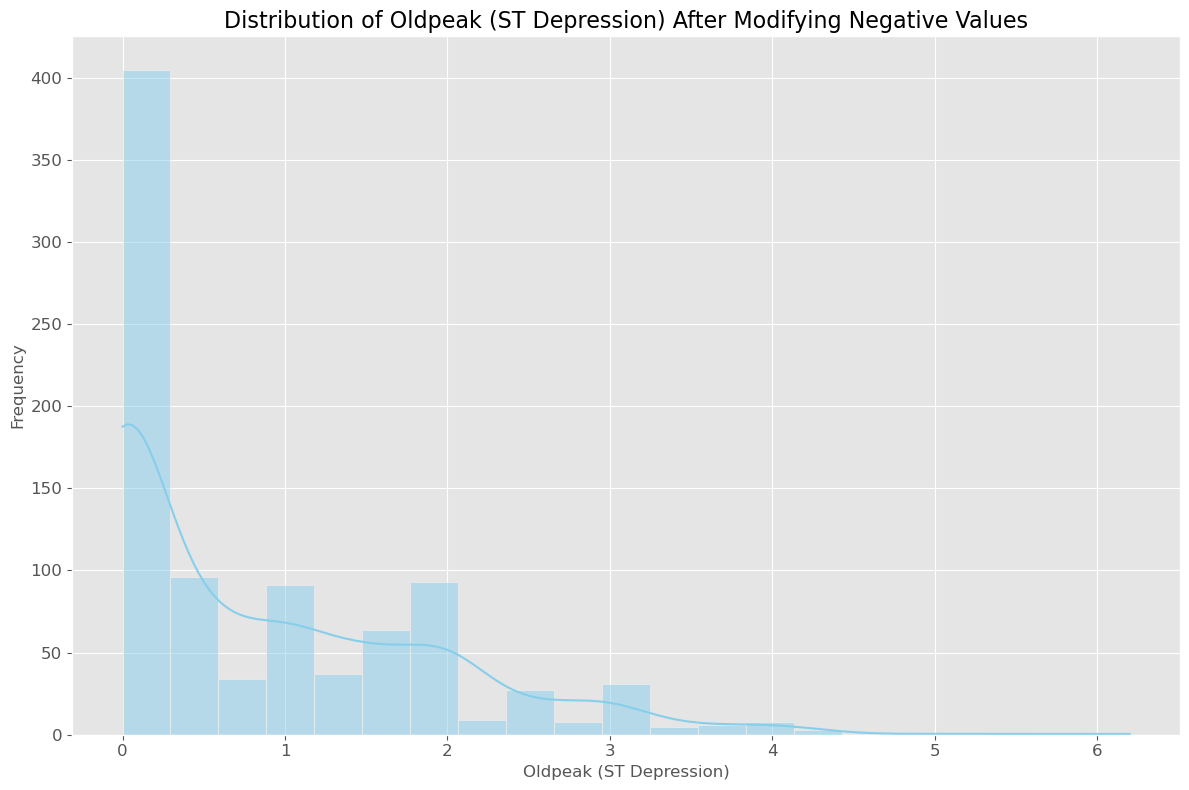

In [23]:
# Replace negative values in the 'oldpeak' column of df with 0
df['oldpeak'] = df['oldpeak'].apply(lambda x: x if x >= 0 else 0)

# Plot the distribution of oldpeak values after modification
plt.figure(figsize=(12, 8))
sns.histplot(df['oldpeak'], kde=True, color='skyblue')
plt.title('Distribution of Oldpeak (ST Depression) After Modifying Negative Values', fontsize=16)
plt.xlabel('Oldpeak (ST Depression)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


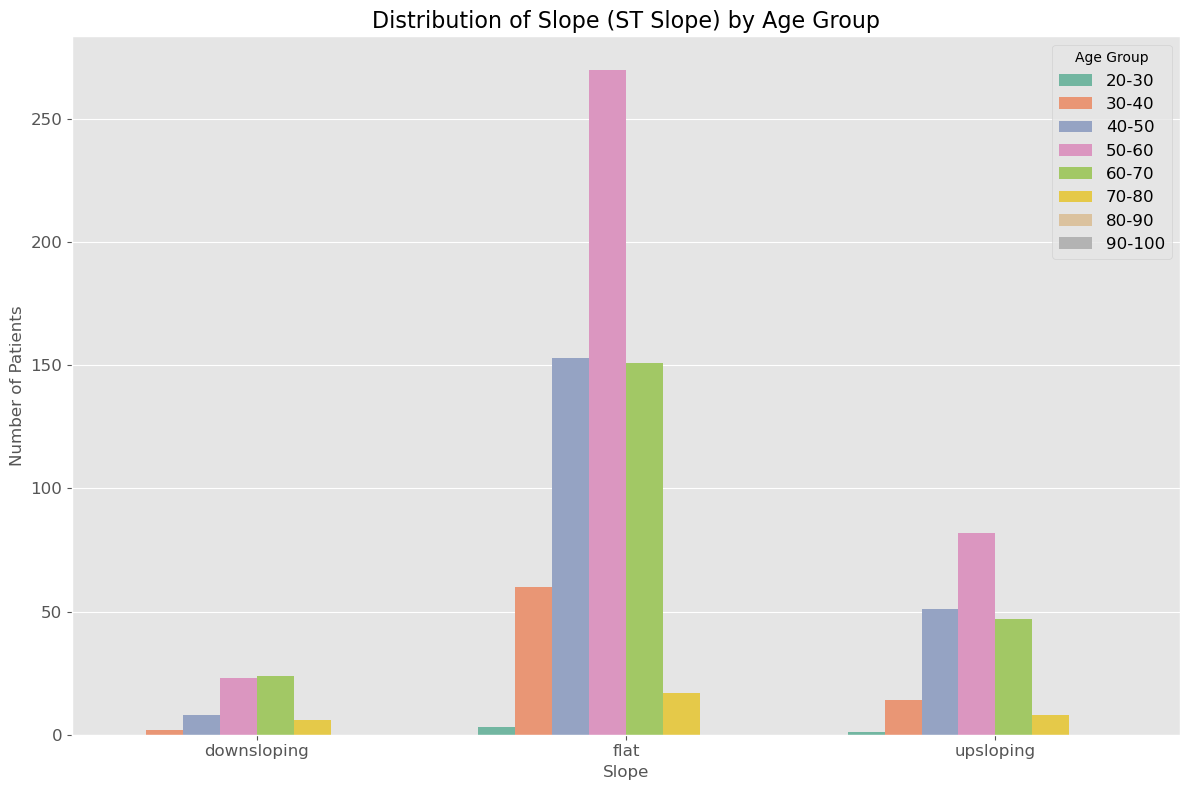

In [24]:
# Plot the distribution of slope with age as hue
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='slope', hue='age_group', palette='Set2')
plt.title('Distribution of Slope (ST Slope) by Age Group', fontsize=16)
plt.xlabel('Slope', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Age Group', fontsize=12)

plt.tight_layout()
plt.show()


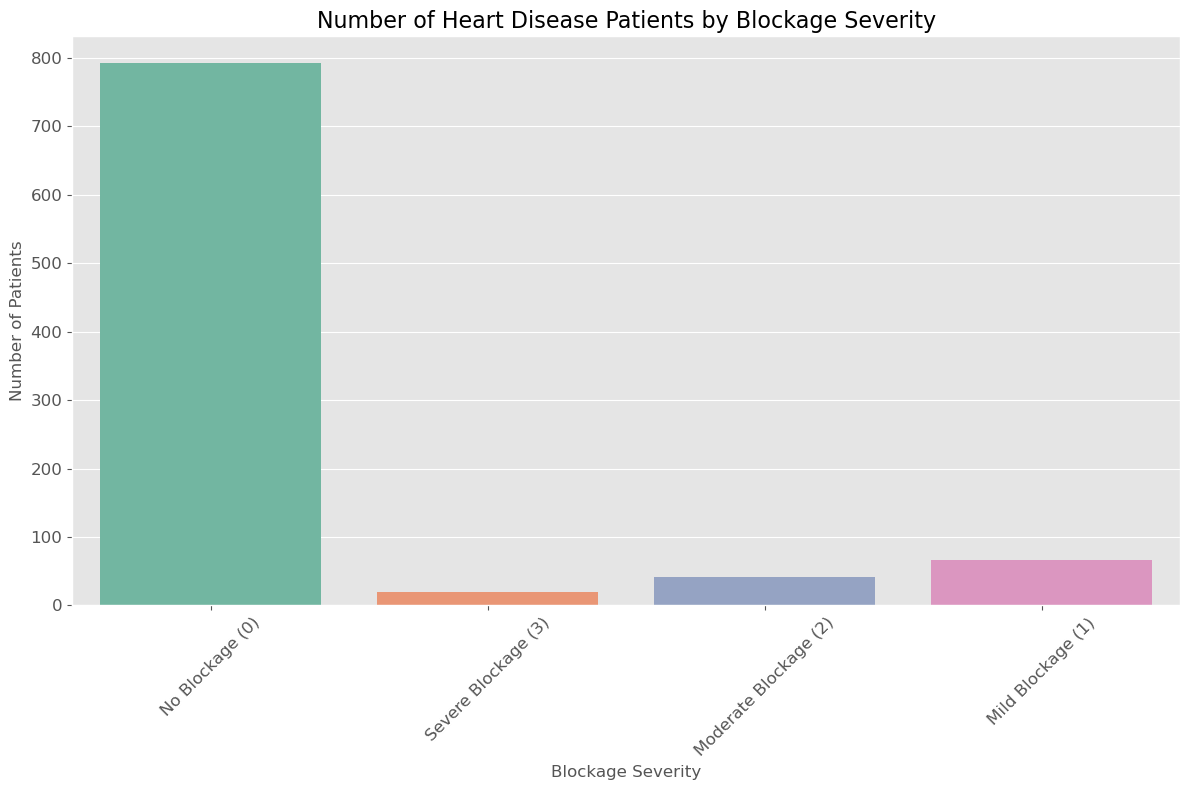

In [25]:

ca_labels = {
    0: 'No Blockage (0)',
    1: 'Mild Blockage (1)',
    2: 'Moderate Blockage (2)',
    3: 'Severe Blockage (3)'
}
df['ca_description'] = df['ca'].map(ca_labels)

# Plotting
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='ca_description', palette='Set2')
plt.title('Number of Heart Disease Patients by Blockage Severity', fontsize=16)
plt.xlabel('Blockage Severity', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


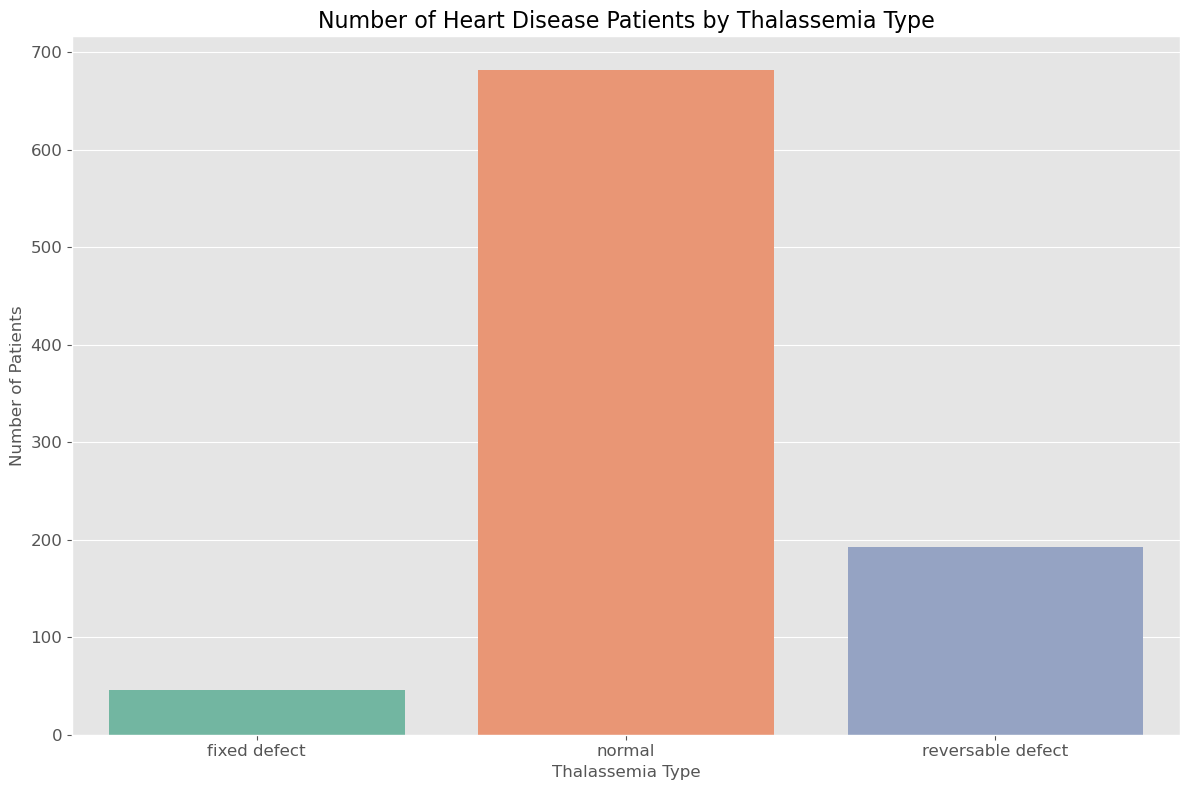

In [26]:
# Plotting the distribution of patients based on thalassemia type
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='thal', palette='Set2')
plt.title('Number of Heart Disease Patients by Thalassemia Type', fontsize=16)
plt.xlabel('Thalassemia Type', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [27]:
# Define a function to detect and handle outliers
def handle_outliers(df, numeric_columns):
    for col in numeric_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Handle outliers: Here, you can either remove or cap the outliers
        # For removing outliers:
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
        # Alternatively, you can cap the outliers (e.g., replace outliers with the upper or lower bound)
        # df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

# List the numeric columns where outliers need to be handled
numeric_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']  # Add more if needed

# Handle outliers
df_no_outliers = handle_outliers(df, numeric_columns)

# Verify the changes
print(df_no_outliers[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']].describe())


              age    trestbps        chol      thalch     oldpeak
count  702.000000  702.000000  702.000000  702.000000  702.000000
mean    52.705128  131.068376  240.918803  141.527066    0.793020
std      9.523150   15.323647   48.536504   23.784067    0.946422
min     28.000000   92.000000   85.000000   80.000000    0.000000
25%     46.000000  120.000000  210.000000  125.000000    0.000000
50%     54.000000  130.000000  234.000000  140.000000    0.500000
75%     59.000000  140.000000  272.000000  160.000000    1.500000
max     77.000000  170.000000  394.000000  202.000000    3.600000


In [28]:
 # Encode 'sex' column (Male=1, Female=0)
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Encode 'cp' (Chest Pain Type) - Map directly if it's categorical like 'typical angina', etc.
cp_mapping = {'typical angina': 0, 'asymptomatic': 1, 'non-anginal': 2, 'atypical angina': 3}
df['cp'] = df['cp'].map(cp_mapping)

# Encode 'restecg' (Resting Electrocardiographic Results) using LabelEncoder
label_encoder = LabelEncoder()
df['restecg'] = label_encoder.fit_transform(df['restecg'])

# Encode 'thal' (Thalassemia) using LabelEncoder
df['thal'] = label_encoder.fit_transform(df['thal'])

# Encode 'slope' (Slope of ST segment) using LabelEncoder
df['slope'] = label_encoder.fit_transform(df['slope'])

# Example: Encoding 'fbs' (Fasting Blood Sugar)
df['fbs'] = df['fbs'].map({True: 1, False: 0})

# Check the transformed DataFrame
print(df.head())

   id  age  sex    dataset  cp  trestbps   chol  fbs  restecg  thalch  ...  \
0   1   63    1  Cleveland   0     145.0  233.0    1        0   150.0  ...   
1   2   67    1  Cleveland   1     160.0  286.0    0        0   108.0  ...   
2   3   67    1  Cleveland   1     120.0  229.0    0        0   129.0  ...   
3   4   37    1  Cleveland   2     130.0  250.0    0        1   187.0  ...   
4   5   41    0  Cleveland   3     130.0  204.0    0        0   172.0  ...   

   slope   ca  thal  num  age_group  chol_group heart_disease fbs_group  \
0      0  0.0     0    0      60-70     200-250            No      High   
1      1  3.0     1    2      60-70     250-300           Yes    Normal   
2      1  2.0     2    1      60-70     200-250           Yes    Normal   
3      0  0.0     1    0      30-40     250-300            No    Normal   
4      2  0.0     1    0      40-50     200-250            No    Normal   

  thalch_group         ca_description  
0      140-160        No Blockage (0)  


In [29]:
# Label encode remaining categorical features
categorical_cols = ['age_group', 'chol_group', 'thalch_group', 'ca_description', 'heart_disease']

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Verify encoding
print(df.head())
print(df.dtypes)


   id  age  sex    dataset  cp  trestbps   chol  fbs  restecg  thalch  ...  \
0   1   63    1  Cleveland   0     145.0  233.0    1        0   150.0  ...   
1   2   67    1  Cleveland   1     160.0  286.0    0        0   108.0  ...   
2   3   67    1  Cleveland   1     120.0  229.0    0        0   129.0  ...   
3   4   37    1  Cleveland   2     130.0  250.0    0        1   187.0  ...   
4   5   41    0  Cleveland   3     130.0  204.0    0        0   172.0  ...   

   slope   ca  thal  num  age_group  chol_group  heart_disease  fbs_group  \
0      0  0.0     0    0          4           2              0       High   
1      1  3.0     1    2          4           3              1     Normal   
2      1  2.0     2    1          4           2              1     Normal   
3      0  0.0     1    0          1           3              0     Normal   
4      2  0.0     1    0          2           2              0     Normal   

   thalch_group ca_description  
0             2              2  
1 

In [30]:
# Create a copy of the dataframe
df_copy = df.copy()

# Drop unnecessary columns
df_copy = df_copy.drop(columns=['id', 'dataset', 'fbs_group'])


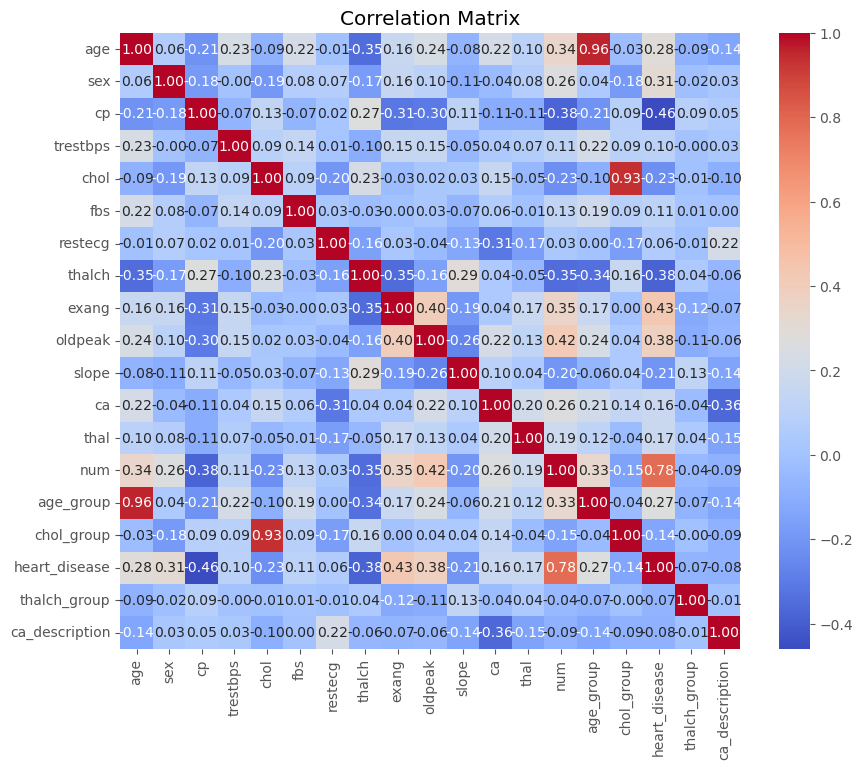

In [31]:
# Plot correlation matrix heatmap
corr = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [32]:
# Classification models
classification_models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()), 
        ('model', LogisticRegression())
    ]),
    'K-Nearest Neighbours': Pipeline([
        ('scaler', StandardScaler()), 
        ('model', KNeighborsClassifier())
    ]),
    'Support Vector Machines': Pipeline([
        ('scaler', StandardScaler()), 
        ('model', SVC())
    ]),
    'Decision Tree': DecisionTreeClassifier(),  # No scaling needed
    'Random Forest': RandomForestClassifier(),  # No scaling needed
    'Gradient Boosting': GradientBoostingClassifier(),  # No scaling needed
    'XGBoost': xgb.XGBClassifier(),  # No scaling needed
    'AdaBoost': AdaBoostClassifier(),  # No scaling needed
    'Gaussian Naive Bayes': GaussianNB()  # No scaling needed
}

# Model performance tracking
model_names = []
accuracies = []




In [33]:

features = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
    'thalch_group', 'ca_description'
]

X = df_copy[features]  
y = df_copy['num']  


In [34]:
from imblearn.over_sampling import SMOTE

# Define SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print new class distribution
print(pd.Series(y_resampled).value_counts())


num
0    411
2    411
1    411
3    411
4    411
Name: count, dtype: int64


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [36]:
# Training and evaluating models
for name, clf in classification_models.items():
    clf.fit(x_train, y_train)  # Pipelines apply scaling where needed
    score = clf.score(x_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.4f}")

# Store results in a DataFrame
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})


Logistic Regression accuracy: 0.5450
K-Nearest Neighbours accuracy: 0.7202
Support Vector Machines accuracy: 0.6910
Decision Tree accuracy: 0.7105
Random Forest accuracy: 0.8151
Gradient Boosting accuracy: 0.7080
XGBoost accuracy: 0.8200
AdaBoost accuracy: 0.5085
Gaussian Naive Bayes accuracy: 0.4599


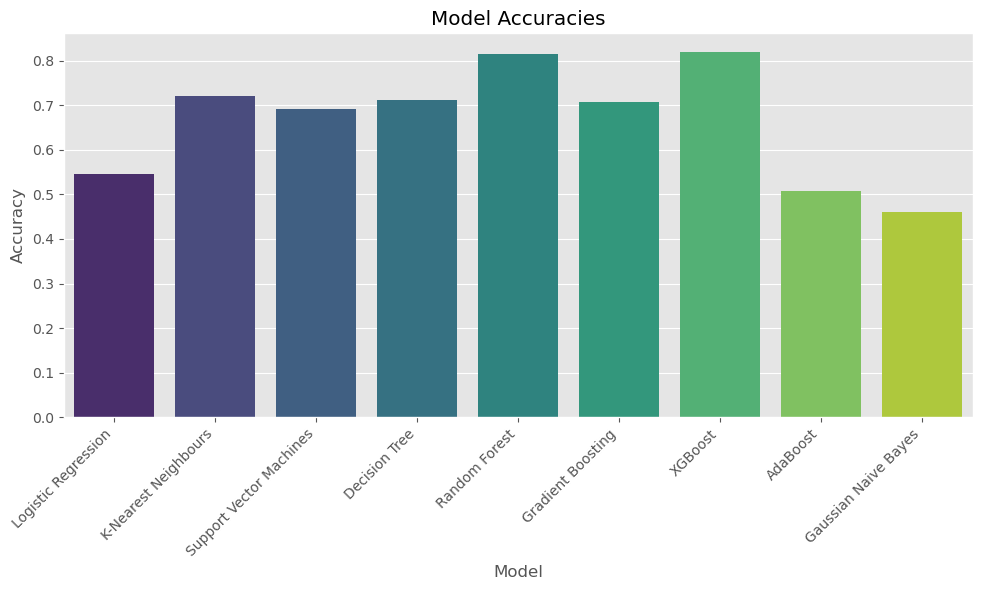

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_models, palette='viridis')
plt.title('Model Accuracies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [38]:
if accuracies:
    best_index = accuracies.index(max(accuracies))
    best_model_name = model_names[best_index]
    best_model = classification_models[best_model_name]

    print(f"The best model is: {best_model_name} with an accuracy of {accuracies[best_index]:.4f}")
else:
    print("The accuracies list is empty. Please ensure that models have been evaluated and accuracies recorded.")

The best model is: XGBoost with an accuracy of 0.8200


In [39]:
y_pred = best_model.predict(x_test)

# Print classification report
print(f"\nClassification Report for {best_model_name}:\n")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(f"\nConfusion Matrix for {best_model_name}:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        85
           1       0.71      0.62      0.66        81
           2       0.74      0.88      0.80        72
           3       0.89      0.83      0.86        84
           4       0.92      0.93      0.93        89

    accuracy                           0.82       411
   macro avg       0.82      0.82      0.82       411
weighted avg       0.82      0.82      0.82       411


Confusion Matrix for XGBoost:

[[71  6  6  2  0]
 [14 50 11  4  2]
 [ 0  4 63  3  2]
 [ 1  7  3 70  3]
 [ 1  3  2  0 83]]


In [40]:
test_data = pd.DataFrame([
    {'age': 45, 'sex': 1, 'cp': 2, 'trestbps': 130, 'chol': 200, 'fbs': 0, 'restecg': 1, 'thalch': 150, 
     'exang': 0, 'oldpeak': 1.2, 'slope': 2, 'ca': 0, 'thal': 2, 
     'thalch_group': 1, 'ca_description': 0},  # Adjust categorical values to match training data encoding

    {'age': 60, 'sex': 0, 'cp': 1, 'trestbps': 140, 'chol': 250, 'fbs': 1, 'restecg': 0, 'thalch': 120, 
     'exang': 1, 'oldpeak': 2.5, 'slope': 1, 'ca': 2, 'thal': 3, 
     'thalch_group': 2, 'ca_description': 1},

    {'age': 35, 'sex': 1, 'cp': 3, 'trestbps': 120, 'chol': 180, 'fbs': 0, 'restecg': 1, 'thalch': 170, 
     'exang': 0, 'oldpeak': 0.0, 'slope': 2, 'ca': 1, 'thal': 2, 
     'thalch_group': 1, 'ca_description': 1},

    {'age': 70, 'sex': 0, 'cp': 0, 'trestbps': 150, 'chol': 280, 'fbs': 1, 'restecg': 0, 'thalch': 100, 
     'exang': 1, 'oldpeak': 3.0, 'slope': 0, 'ca': 3, 'thal': 3, 
     'thalch_group': 3, 'ca_description': 2},
])


test_data = test_data[features]


best_model = classification_models['XGBoost']
predictions = best_model.predict(test_data)
risk_levels = {0: "No Heart Disease", 1: "Mild Risk", 2: "Moderate Risk", 3: "High Risk", 4: "Severe Risk"}

for i, pred in enumerate(predictions):
    print(f"Patient {i+1}: {risk_levels.get(pred, 'Unknown Risk')}")


Patient 1: No Heart Disease
Patient 2: High Risk
Patient 3: No Heart Disease
Patient 4: High Risk
